C:\Users\gouta\AppData\Local\Temp/ipykernel_17552/2892227212.py:29: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\gouta\AppData\Local\Temp/ipykernel_17552/2892227212.py:55: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\gouta\AppData

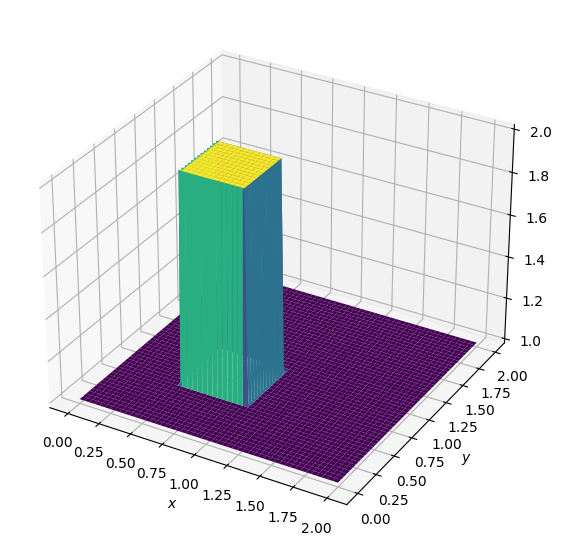

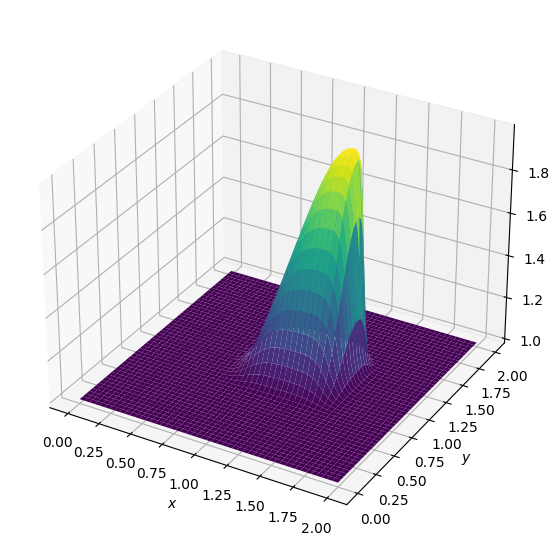

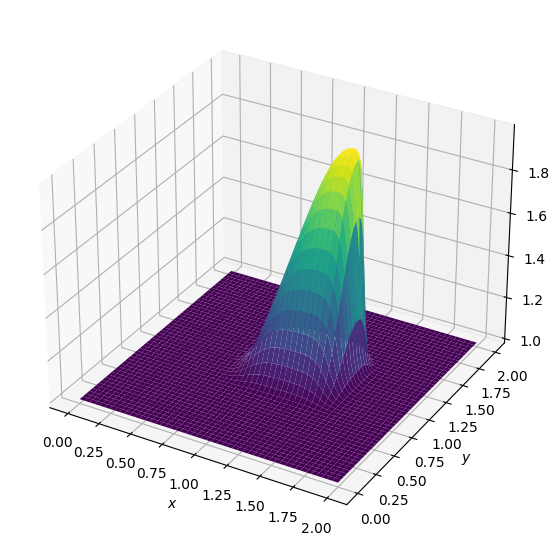

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');